<a href="https://colab.research.google.com/github/Sidhtang/30-day-ml-challenge-/blob/main/day_16_text_summerisation_using_transformerss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#different  text summerisation using different models
# 1 st is gp2
#One of the model’s surprising features is that we can also use it to generate summaries
#by simply appending “TL;DR” at the end of the input text

In [1]:
import torch
import nltk
nltk.download('punkt')
from transformers import SummarizationPipeline, T5ForConditionalGeneration, T5Tokenizer
from nltk.tokenize import sent_tokenize

# Load the T5 model and tokenizer
model = T5ForConditionalGeneration.from_pretrained("t5-large")
tokenizer = T5Tokenizer.from_pretrained("t5-large")

# Define the sample text
sample_text = "This is a sample text that needs to be summarized."

# Create the pipeline object
pipe = SummarizationPipeline(model=model, tokenizer=tokenizer)

# Run the pipeline on the sample text
pipe_out = pipe(sample_text)

# Define the summaries dictionary
summaries = {}

# Process the output and store it in the summaries dictionary
summaries["t5"] = "\n".join(sent_tokenize(pipe_out[0]["summary_text"]))

print(summaries)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reaso

{'t5': '.. text.\nThis is a sample text that needs to be summarize'}


In [2]:
import torch
from transformers import pipeline, AutoModelForSeq2SeqLM, AutoTokenizer
from nltk.tokenize import sent_tokenize

def load_model_and_tokenizer(model_name):
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    return model, tokenizer

def create_pipeline(task, model, tokenizer):
    return pipeline(task, model=model, tokenizer=tokenizer)

def summarize_text(pipe, text):
    pipe_out = pipe(text)
    return "\n".join(sent_tokenize(pipe_out[0]["summary_text"]))

def main():
    sample_text = "This is a sample text that needs to be summarized."

    # Load the BART model and tokenizer
    bart_model, bart_tokenizer = load_model_and_tokenizer("facebook/bart-large-cnn")

    # Create the BART pipeline
    bart_pipe = create_pipeline("summarization", bart_model, bart_tokenizer)

    # Summarize the text using BART
    bart_summary = summarize_text(bart_pipe, sample_text)

    # Load the T5 model and tokenizer
    t5_model, t5_tokenizer = load_model_and_tokenizer("t5-large")

    # Create the T5 pipeline
    t5_pipe = create_pipeline("summarization", t5_model, t5_tokenizer)

    # Summarize the text using T5
    t5_summary = summarize_text(t5_pipe, sample_text)

    # Store the summaries in a dictionary
    summaries = {
        "bart": bart_summary,
        "t5": t5_summary
    }

    print(summaries)

if __name__ == "__main__":
    main()

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Your max_length is set to 142, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 200, but your input_length is only 16. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


{'bart': 'This is a sample text that needs to be summarized.\nThis is an excerpt from a book about the history of the U.S. military.\nThe book is called "The First World War: A History of the United States of America" and is published by Simon & Schuster.\nFor more information, visit the book\'s website.', 't5': 'this is a sample text that needs to be summarized .\nit is based on a free online encyclopedia .\nif you want to see the full text, click here .'}


In [ ]:
# two most common metrics to determine whethe the quality of geneated contet is good or not
# BLEU AND ROGUE

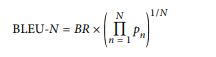

In [3]:
# @title BLEU
#it is a precison base metic that looks at words or n grams which compares tthe two
#texts and count the number of words in the generation and divide it by  the length of generation
# . To compensate for that the authors of BLEU
#introduced an additional term, the brevity penalty:
from IPython.display import Image
Image("/content/Screenshot 2024-08-21 134442.png")
#bleu weakness is that it expects the text to be tokenized



In [3]:
!pip install sacrebleu
from datasets import load_metric
bleu_metric = load_metric('sacrebleu')
import pandas as pd
import numpy as np
bleu_metric.add(
 prediction="the the the the the the", reference=["the cat is on the mat"])
results = bleu_metric.compute(smooth_method="floor", smooth_value=0)
results["precisions"] = [np.round(p, 2) for p in results["precisions"]]
pd.DataFrame.from_dict(results, orient="index", columns=["Value"])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 4.8 MB/s eta 0:00:00


,Value
score,0.0
counts,"[2, 0, 0, 0]"
totals,"[6, 5, 4, 3]"
precisions,"[33.33, 0.0, 0.0, 0.0]"
bp,1.0
sys_len,6
ref_len,6


In [4]:
bleu_metric.add(
 prediction="the cat is on mat", reference=["the cat is on the mat"])
results = bleu_metric.compute(smooth_method="floor", smooth_value=0)
results["precisions"] = [np.round(p, 2) for p in results["precisions"]]
pd.DataFrame.from_dict(results, orient="index", columns=["Value"])

,Value
score,57.893007
counts,"[5, 3, 2, 1]"
totals,"[5, 4, 3, 2]"
precisions,"[100.0, 75.0, 66.67, 50.0]"
bp,0.818731
sys_len,5
ref_len,6


In [9]:
# @title ROGUE metric
#The approach is very similar
#THEto the BLEU score in that we look at different n-grams and compare their occurrences
#in the generated text and the reference texts. The difference is that with ROUGE we
#check how many n-grams in the reference text also occur in the generated text
# LONGEST COMMON substring score os called rouge l
!pip install rouge_score
from datasets import load_metric
rouge_metric = load_metric('rouge')

# Replace 'cnn_dailymail' with the actual name of the dataset you want to use
dataset = load_dataset("cnn_dailymail", '3.0.0')

reference = dataset["train"][1]["highlights"]
records = []
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

# Make sure 'summaries' is defined and contains your model predictions
# Example:
summaries = {
    "model_a": "This is a summary generated by model A.",
    "model_b": "Another summary from model B."
}

for model_name in summaries:
 rouge_metric.add(prediction=summaries[model_name], reference=reference)
 score = rouge_metric.compute()
 rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names)
 records.append(rouge_dict)
pd.DataFrame.from_records(records, index=summaries.keys())

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

,rouge1,rouge2,rougeL,rougeLsum
model_a,0.070175,0.0,0.035088,0.070175
model_b,0.000000,0.0,0.000000,0.000000


In [10]:
#evaluating the pegaus model with cnn dataset
def evaluate_summaries_baseline(dataset, metric,
 column_text="article",
 column_summary="highlights"):
 summaries = [three_sentence_summary(text) for text in dataset[column_text]]
 metric.add_batch(predictions=summaries,
 references=dataset[column_summary])
 score = metric.compute()
 return score

In [12]:
from tqdm import tqdm
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

def chunks(list_of_elements, batch_size):
    """Yield successive batch-sized chunks from list_of_elements."""
    for i in range(0, len(list_of_elements), batch_size):
        yield list_of_elements[i : i + batch_size]

def evaluate_summaries_pegasus(dataset, metric, model, tokenizer,
                               batch_size=16, device=device,
                               column_text="article",
                               column_summary="highlights"):
    article_batches = list(chunks(dataset[column_text], batch_size))
    target_batches = list(chunks(dataset[column_summary], batch_size))

    for article_batch, target_batch in tqdm(
        zip(article_batches, target_batches), total=len(article_batches)):

        inputs = tokenizer(article_batch, max_length=1024,  truncation=True,
                        padding="max_length", return_tensors="pt")

        summaries = model.generate(input_ids=inputs["input_ids"].to(device),
                         attention_mask=inputs["attention_mask"].to(device),
                         length_penalty=0.8, num_beams=8, max_length=128)

        decoded_summaries = [tokenizer.decode(s, skip_special_tokens=True,
                                clean_up_tokenization_spaces=True)
               for s in summaries]
        decoded_summaries = [d.replace("", " ") for d in decoded_summaries]
        metric.add_batch(predictions=decoded_summaries, references=target_batch)

    score = metric.compute()
    return score

In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
model_ckpt = "google/pegasus-cnn_dailymail"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt).to(device)
score = evaluate_summaries_pegasus(test_sampled, rouge_metric,
 model, tokenizer, batch_size=8)
rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names)
pd.DataFrame(rouge_dict, index=["pegasus"])

tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

  0%|          | 0/125 [00:00<?, ?it/s]